In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import umap
import umap.plot

import scipy.sparse as sp_sparse
from scipy.sparse import csr_matrix
import scanpy as sc
import anndata

In [193]:
save_dir ='../figures/'
results_dir = '../results/'
ref_dir = '../../data/NGJ/'
ref_dataset_name = 'js'
ref_assignment_dataset_name = 'SEACell_assignments'
bulk_dataset_name = 'exp_metadata_cleaned_js'
bulk_split_suffix = '_sus'

SHIFT = False
shift = '_shift' if SHIFT else ''
SWITCH = True
switch = '_switch' if SWITCH else ''
normalization = 'switch' if SWITCH else 'gene'
model = 'Normal'
DATE = '2024-06-09'

In [194]:
# read reference data
ref_df = pd.read_csv(ref_dir + ref_dataset_name + '_' + normalization + '.csv', delimiter='\t', index_col=0).T
ref_df.head()


,aDC_HPCA_1,aDC_HPCA_2,aDC_HPCA_3,aDC_IRIS_1,aDC_IRIS_2,aDC_IRIS_3,Adipocytes_ENCODE_1,Adipocytes_ENCODE_2,Adipocytes_ENCODE_3,Adipocytes_FANTOM_1,...,Th2 cells_IRIS_3,Tregs_BLUEPRINT_1,Tregs_BLUEPRINT_2,Tregs_BLUEPRINT_3,Tregs_FANTOM_1,Tregs_FANTOM_2,Tregs_FANTOM_3,Tregs_HPCA_1,Tregs_HPCA_2,Tregs_HPCA_3
AAACCCAAGCAGCACA-1,0.0,0.0,0.0,1.356766,2.462501,3.123722,0.982005,1.643731,2.083406,0.0,...,0.000000,1.583782,1.995188,1.696379,1.995188,1.696379,2.233403,0.832646,0.000000,0.00000
AAACGAAAGACCGTTT-1,0.0,0.0,0.0,0.000000,0.223811,0.208771,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
AAACGAAAGGGCGAAG-1,0.0,0.0,0.0,0.000000,0.084574,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
AAACGCTTCCTCGCAT-1,0.0,0.0,0.0,1.297716,2.144062,2.140414,0.000000,0.777578,1.099015,0.0,...,1.567249,1.790529,0.000000,1.371929,0.000000,1.371929,1.628998,1.002522,1.203026,1.09366
AAAGAACAGGGAGGAC-1,0.0,0.0,0.0,0.000000,0.391915,0.536148,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.799061,0.000000,0.000000,0.00000


In [195]:
# read cluster assignment
ref_assign_df = pd.read_csv(ref_dir + ref_assignment_dataset_name + '_' + normalization + '.csv', delimiter="\t", index_col=0)
ref_assign_df.head()

,SEACell
index,
AAACCCAAGCAGCACA-1,SEACell-3
AAACGAAAGACCGTTT-1,SEACell-9
AAACGAAAGGGCGAAG-1,SEACell-10
AAACGCTTCCTCGCAT-1,SEACell-1
AAAGAACAGGGAGGAC-1,SEACell-6


In [196]:
clusters_mean = ref_df.groupby(ref_assign_df['SEACell']).mean()
clusters_std = ref_df.groupby(ref_assign_df['SEACell']).std()
clusters_mean.head()

,aDC_HPCA_1,aDC_HPCA_2,aDC_HPCA_3,aDC_IRIS_1,aDC_IRIS_2,aDC_IRIS_3,Adipocytes_ENCODE_1,Adipocytes_ENCODE_2,Adipocytes_ENCODE_3,Adipocytes_FANTOM_1,...,Th2 cells_IRIS_3,Tregs_BLUEPRINT_1,Tregs_BLUEPRINT_2,Tregs_BLUEPRINT_3,Tregs_FANTOM_1,Tregs_FANTOM_2,Tregs_FANTOM_3,Tregs_HPCA_1,Tregs_HPCA_2,Tregs_HPCA_3
SEACell,,,,,,,,,,,,,,,,,,,,,
SEACell-0,0.088203,0.206948,0.206948,0.278246,0.544481,0.574231,0.133814,0.158944,0.167824,0.150611,...,0.285270,0.461256,0.482691,0.475206,0.482691,0.475206,0.332564,0.283724,0.229074,0.279671
SEACell-1,0.022853,0.178463,0.178463,1.614690,2.215976,2.532367,0.308467,0.524430,0.977646,0.019234,...,1.551452,1.908422,1.768058,2.263619,1.768058,2.263619,2.040329,1.890073,0.958886,1.608998
SEACell-10,0.000000,0.063038,0.063038,0.122210,0.196284,0.200883,0.000000,0.000000,0.000000,0.000000,...,0.039114,0.058763,0.019410,0.086185,0.019410,0.086185,0.051390,0.086199,0.065202,0.094035
SEACell-11,0.063171,0.362663,0.362663,1.042674,2.009280,2.231176,0.355539,0.582750,0.918411,0.017032,...,1.581861,1.695789,1.280067,1.769358,1.280067,1.769358,1.720897,1.273076,0.499207,1.156396
SEACell-12,0.044223,0.154290,0.154290,0.299697,0.761807,0.869941,0.048469,0.128982,0.336714,0.000000,...,0.484967,0.751177,0.582921,0.871185,0.582921,0.871185,0.449819,0.214982,0.131331,0.170555


In [197]:
# # plot UMAP
# mapper = umap.UMAP().fit(ref_df)
# umap.plot.points(mapper, labels=ref_assign_df['SEACell'])

In [198]:
# read cell fractions
cell_fractions = pd.read_csv(f'{results_dir}{bulk_dataset_name}{bulk_split_suffix}/{model}/cell_prob_{DATE}_js{switch}{shift}.csv', index_col=0)
cell_fractions.index = clusters_mean.index
cell_fractions.index_name = 'SEACell'

In [199]:
# reorder cell fractions
reorder_list = [f'SEACell-{i}' for i in range(0, 15)]
cell_fractions = cell_fractions.reindex(reorder_list)
cell_fractions

,0,1,2,3,4
SEACell,,,,,
SEACell-0,0.000008,0.000007,0.000011,0.000016,0.000051
SEACell-1,0.000009,0.000008,0.000011,0.000016,0.000050
SEACell-2,0.000011,0.000011,0.000016,0.000028,0.000071
SEACell-3,0.000008,0.000007,0.000010,0.000015,0.000048
SEACell-4,0.375842,0.376161,0.397005,0.407697,0.442500
SEACell-5,0.624014,0.623708,0.602817,0.592023,0.556713
SEACell-6,0.000036,0.000033,0.000048,0.000072,0.000178
SEACell-7,0.000015,0.000013,0.000013,0.000020,0.000052
SEACell-8,0.000009,0.000008,0.000011,0.000017,0.000052


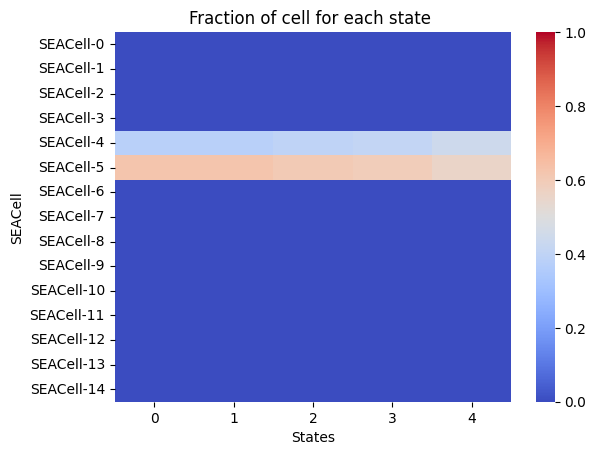

In [200]:
# plot heatmap
plt.clf()
ax = sns.heatmap(cell_fractions, cmap = 'coolwarm', linewidth=0, yticklabels=True, vmin=0, vmax=1)
ax.set_xlabel('States')
ax.set_ylabel('SEACell')
plt.title("Fraction of cell for each state ")
title = f'{save_dir}{model}_cell_fraction_plot{switch}{shift}{bulk_split_suffix}'
plt.savefig(title, dpi=300, bbox_inches="tight")

### Analyze results

In [67]:
ref_adata = anndata.AnnData(csr_matrix(ref_df.values))
ref_adata

AnnData object with n_obs × n_vars = 1905 × 489

In [68]:
ref_adata.obs_names = ref_df.index
ref_adata.var_names = ref_df.columns
ref_adata.obs['SEACell'] = ref_assign_df['SEACell']

AnnData object with n_obs × n_vars = 1905 × 489
    obs: 'SEACell'

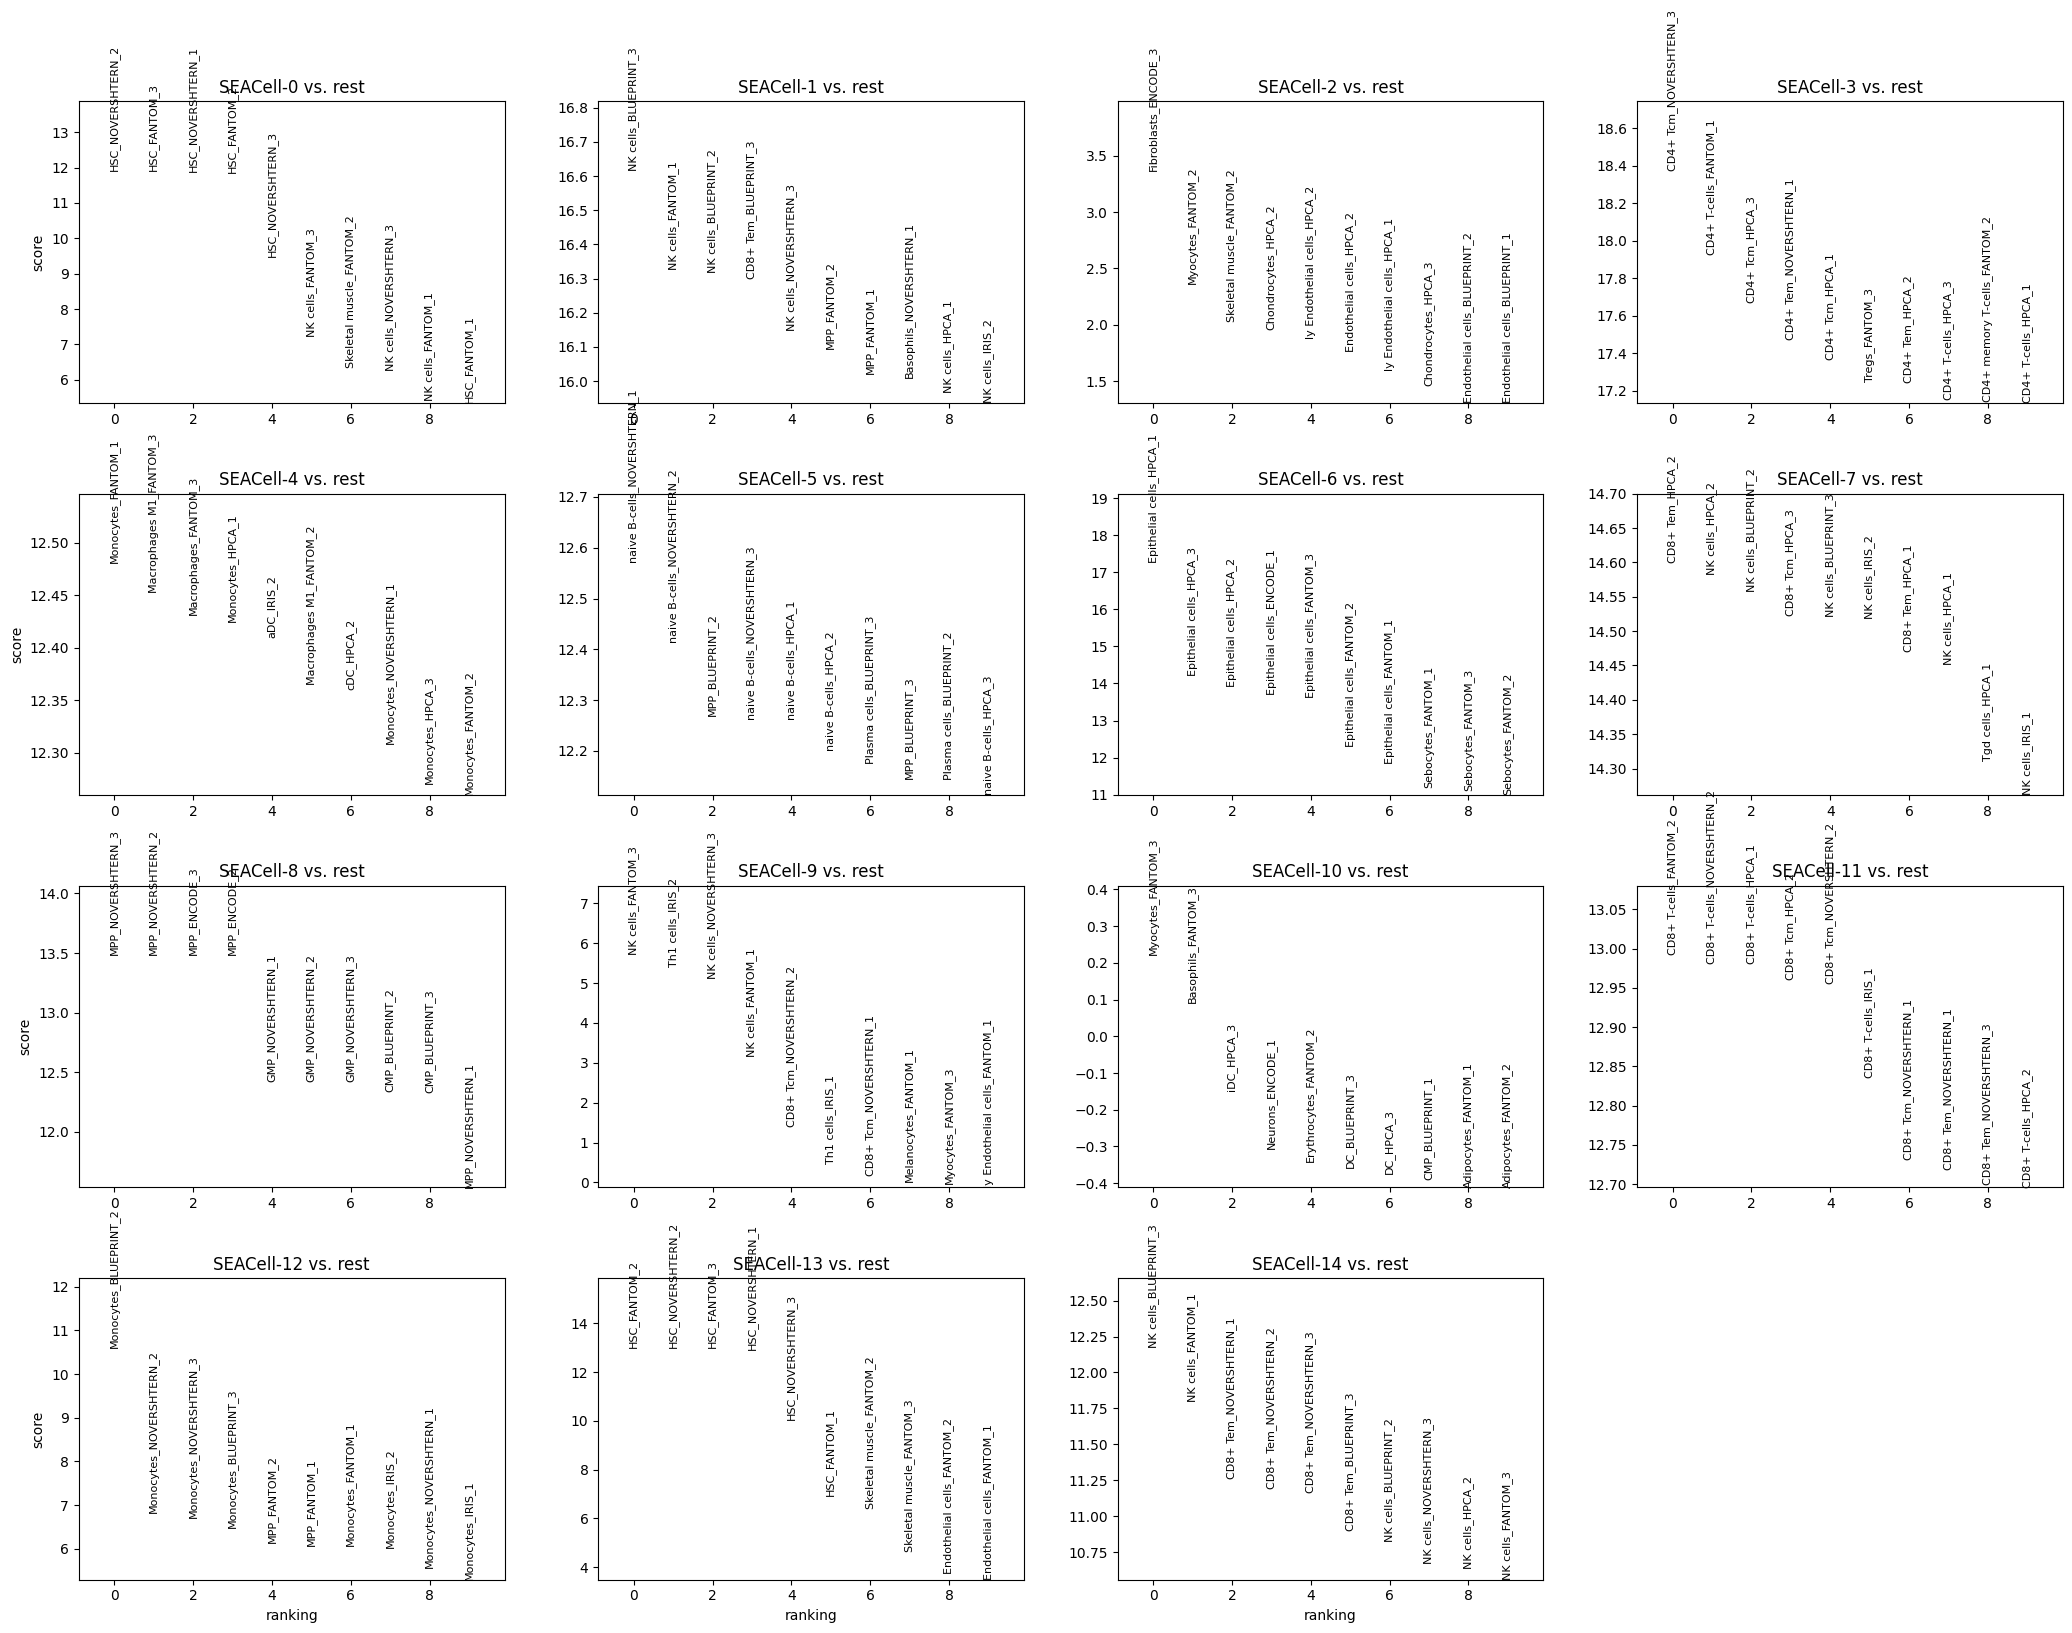

In [70]:
# rank genes
sc.tl.rank_genes_groups(ref_adata, 'SEACell', method='wilcoxon')
sc.pl.rank_genes_groups(ref_adata, n_genes=10, sharey=False, save=f'{model}_rank_genes_groups{switch}{shift}.pdf')